# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [2]:
# from google.colab import drive
# # drive.mount('/content/drive')

Memasukkan library yang akan kamu gunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

Mengambil file .csv dari Google Drive kamu.

In [7]:
# df = pd.read_csv('/content/drive/MyDrive/FIKTI/Notebook/Dataset/housing_data.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

<b>🧹 Menangani Nilai yang Hilang (Missing Values) <b>

In [8]:
print("Jumlah nilai yang hilang pada setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang pada setiap kolom:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


<b>📊 Deteksi Outlier (menggunakan IQR method)<b>

In [9]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outlier pada kolom '{col}': {len(outliers)} data")

Outlier pada kolom 'price': 15 data
Outlier pada kolom 'area': 12 data
Outlier pada kolom 'bedrooms': 12 data
Outlier pada kolom 'bathrooms': 1 data
Outlier pada kolom 'stories': 41 data
Outlier pada kolom 'parking': 12 data


<B>🔠 Encoding Kategorikal<b>

In [10]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<b>📏 Scaling Data Numerik<b>

In [11]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

<b>✅ Final Check<b>

In [12]:
print("\nData setelah cleaning:")
display(df.head())
print(df.describe())


Data setelah cleaning:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0


              price          area      bedrooms     bathrooms       stories  \
count  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02   
mean   2.085997e-16 -1.564498e-16 -1.825247e-16 -2.607496e-17 -1.303748e-16   
std    1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00   
min   -1.614327e+00 -1.614530e+00 -2.665004e+00 -5.701867e-01 -9.293967e-01   
25%   -7.153170e-01 -7.151451e-01 -1.308863e+00 -5.701867e-01 -9.293967e-01   
50%   -2.283534e-01 -2.539222e-01  4.727831e-02 -5.701867e-01  2.244101e-01   
75%    5.208214e-01  5.578300e-01  4.727831e-02  1.421812e+00  2.244101e-01   
max    4.566365e+00  5.096263e+00  4.115701e+00  5.405809e+00  2.532024e+00   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0

## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

In [14]:
num_col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

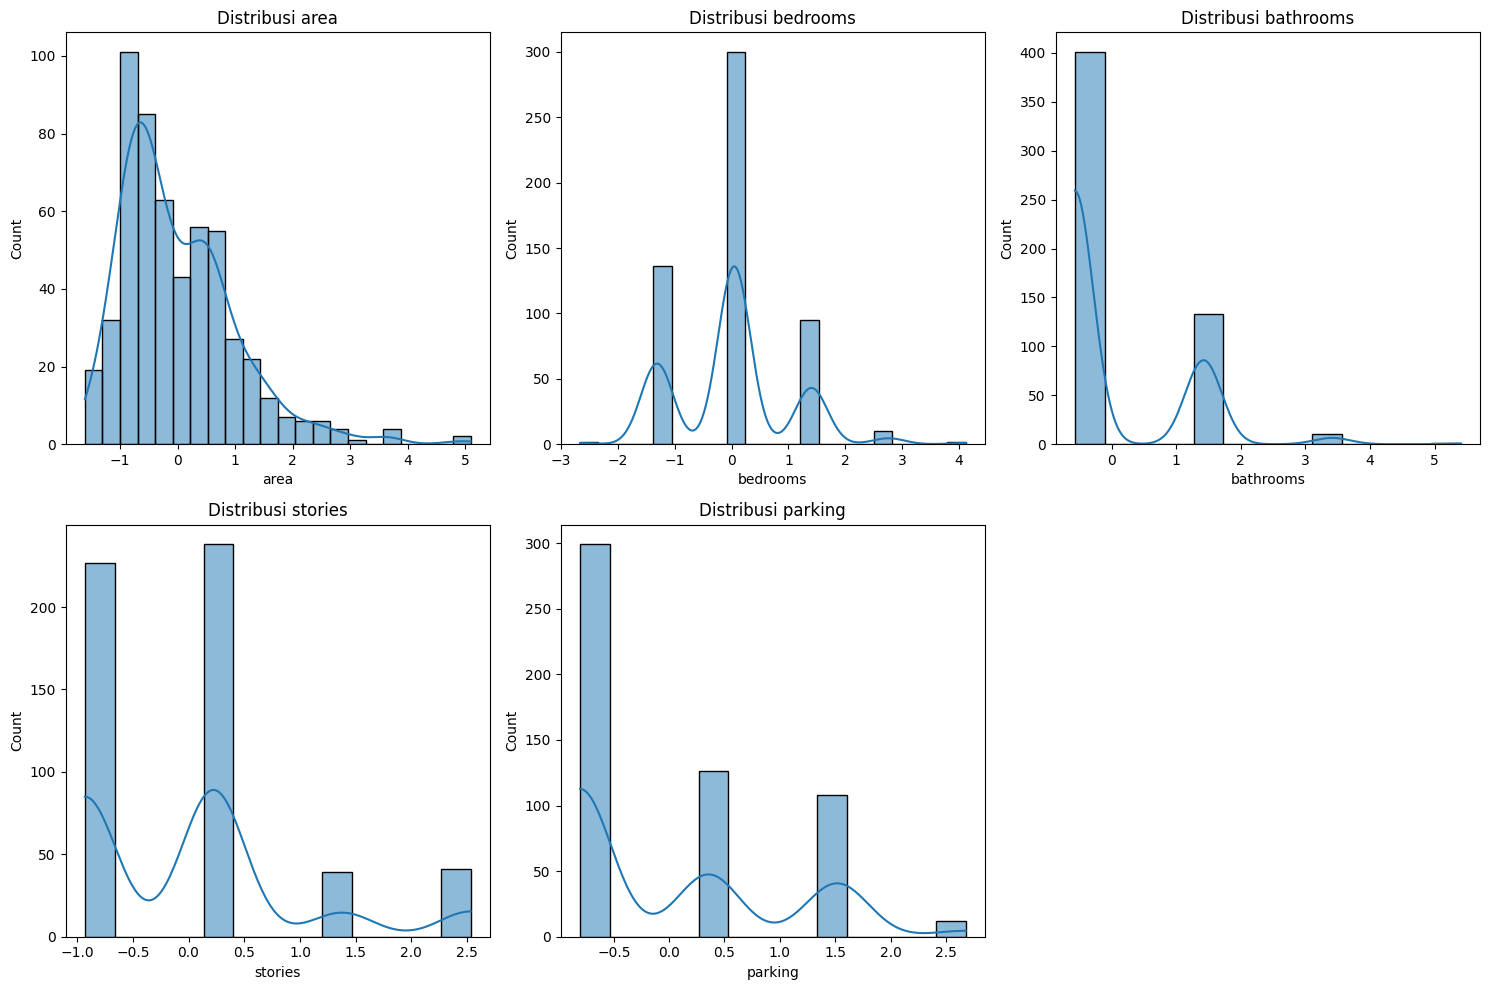

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

for i, col in enumerate(num_col):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_log[col], kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

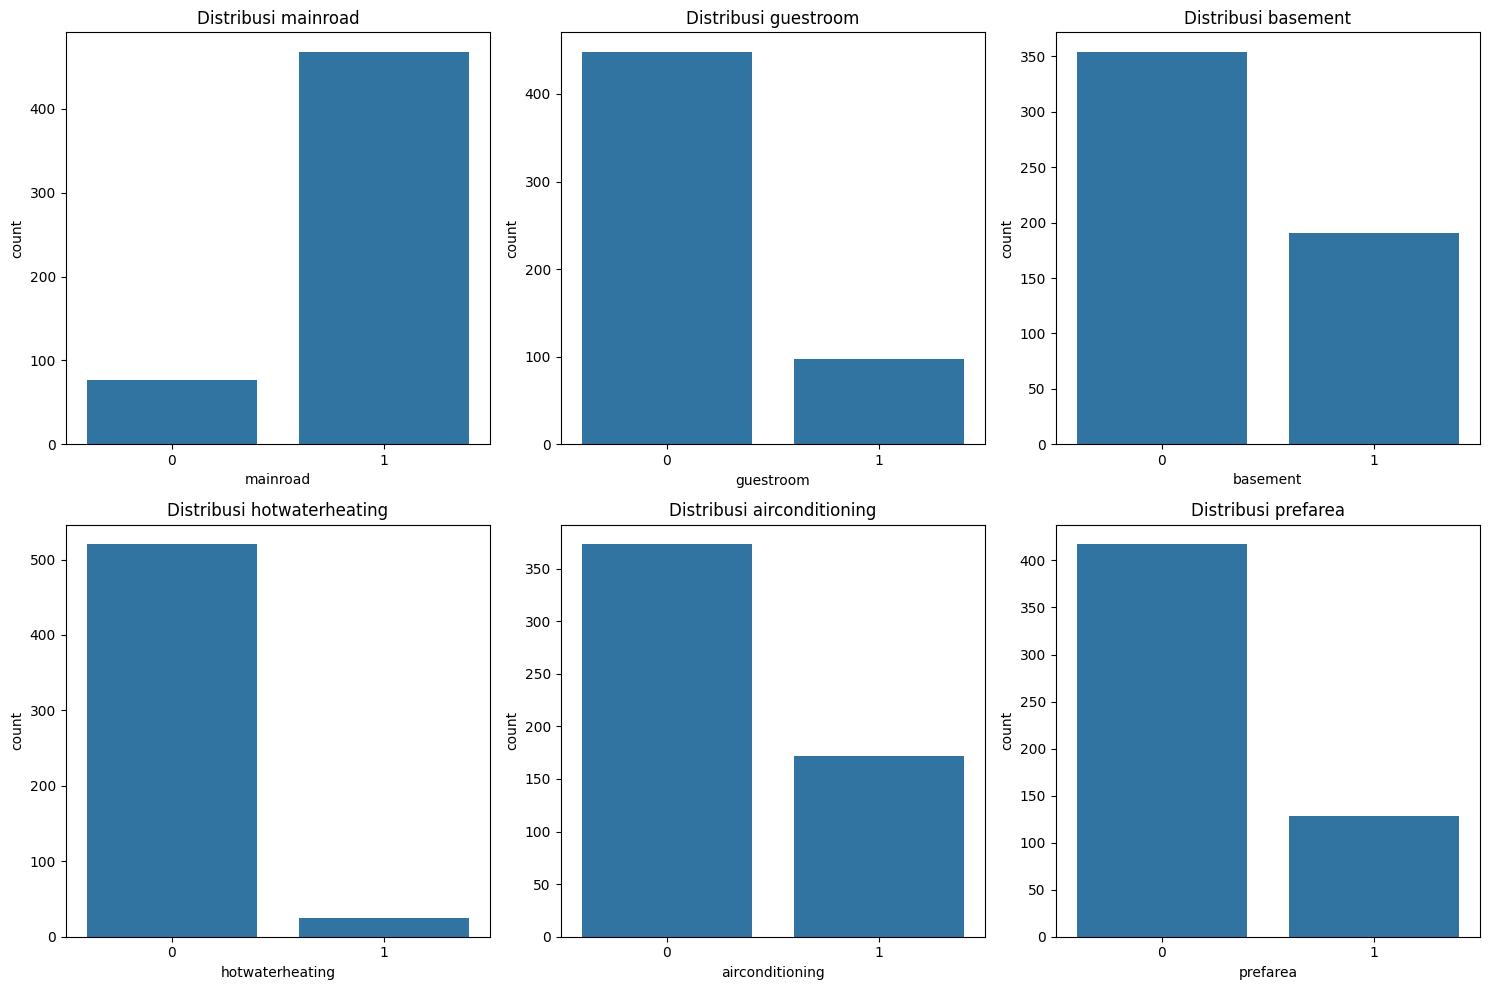

In [19]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_col):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df_log)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

## Data Preparation

Memisahkan data training dan testing

In [22]:
df_log.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [26]:
import numpy as np

df_log['price_log'] = np.log1p(df_log['price'])

target = 'price_log'

X = df_log.drop(columns=[target, 'price'])
y = df_log[target]


X = df_log.drop(columns=[target,'price'])
y = df_log[target]

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [33]:
lr_model = LinearRegression()

In [39]:
# Gabungkan X dan y untuk sinkron
Xy = pd.concat([X_train, y_train], axis=1)

# Hapus baris yang mengandung NaN
Xy = Xy.dropna()

# Pisahkan kembali
X_train = Xy.drop(columns=y_train.name)
y_train = Xy[y_train.name]

In [40]:
y_train = y_train.fillna(y_train.mean())

In [41]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Membuat prediksi model dengan test set
y_pred = lr_model.predict(X_test)

In [43]:
lr_model.intercept_

np.float64(-1.1311825190121039)

In [44]:
# Melihat koefisien
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coefficients

,Feature,Coefficient
4,mainroad,0.682301
8,airconditioning,0.483518
7,hotwaterheating,0.454416
6,basement,0.292007
10,prefarea,0.259569
2,bathrooms,0.256899
0,area,0.242953
5,guestroom,0.203260
11,furnishingstatus,-0.189367
3,stories,0.177018


In [45]:
# Kenaikan AC
np.exp(0.167748) - 1

np.float64(0.18263854817937597)

In [47]:
# Rumah tanpa Furnish
np.exp(-0.115424) - 1

np.float64(-0.10901171522638808)

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [61]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Check for NaNs in y_test and y_pred
# Find indices where either y_test or y_pred has NaN
nan_indices = np.isnan(y_test) | np.isnan(y_pred)

# Remove corresponding rows from both y_test and y_pred
y_test_cleaned = y_test[~nan_indices]
y_pred_cleaned = y_pred[~nan_indices]

# Now calculate the metrics using the cleaned arrays
r2 = r2_score(y_test_cleaned, y_pred_cleaned)
mae = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
mse = mean_squared_error(y_test_cleaned, y_pred_cleaned)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2 Score: 0.5672708385730005
Mean Absolute Error (MAE): 0.4817597410154319
Mean Squared Error (MSE): 0.4336120811427315
Root Mean Squared Error (RMSE): 0.6584922787267375


In [63]:
# Mengeluarkan hasil
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.5673
MAE: 0.4818
MSE: 0.4336
RMSE: 0.6585


In [64]:
np.expm1(0.1676)

np.float64(0.18246353062586385)